### KMeans cluster analysis of voting records at senate

In [9]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
votes = pd.read_csv('../Raw_data/114_congress.csv')
print(euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[1,3:].values.reshape(1, -1)))
distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[2,3:].values.reshape(1, -1))
print(distance)

[[1.73205081]]
[[3.31662479]]


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])
print(senator_distances[0:10])

[[3.12141628 1.3134775 ]
 [2.6146248  2.05339992]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [1.43833966 2.96866004]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.31287498 3.30758755]]


In [21]:
labels = kmeans_model.labels_ 
pd.crosstab(labels, votes["party"])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


In [22]:
democratic_outliers = votes[(labels==1) & (votes['party'] =='D')]
print(democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


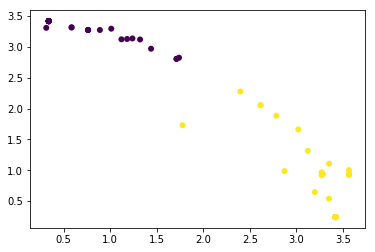

In [29]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.scatter(senator_distances[:,0], senator_distances[:,1], c=labels, linewidths=0)

In [30]:
import numpy as np
extremism = (senator_distances**3).sum(axis=1)
votes['extremism'] = extremism
votes.sort_values('extremism', inplace=True, ascending=False)
print(votes['name'].head(10))

98       Wicker
53     Lankford
69         Paul
80        Sasse
26         Cruz
48      Johnson
47      Isakson
65    Murkowski
64        Moran
30         Enzi
Name: name, dtype: object


### KMeans cluster analysis of nba player data

In [38]:
import pandas as pd
import numpy as np
% matplotlib inline
nba = pd.read_csv('../Raw_data/nba_2013.csv')
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [36]:
point_guards = nba[nba['pos'] == 'PG']
point_guards['ppg'] = point_guards['pts'] / point_guards['g']  # Points Per Game
point_guards[['pts', 'g', 'ppg']].head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


Text(0,0.5,'Assist Turnover Ratio')

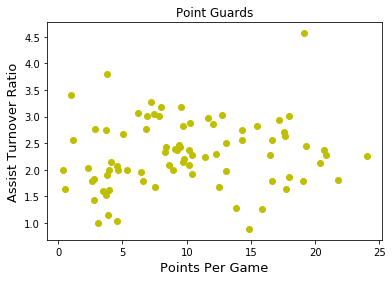

In [39]:
point_guards = point_guards[point_guards['tov'] != 0]
# create new column 'atr' (Assist Turnover Ratio)
point_guards['atr'] = point_guards['ast'] / point_guards['tov'] 
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

Text(0,0.5,'Assist Turnover Ratio')

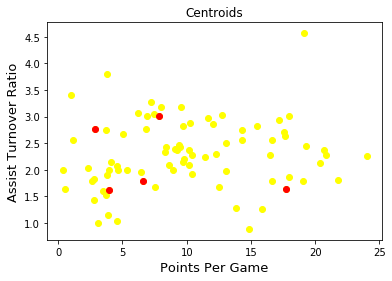

In [51]:
num_clusters = 5
random_initial_points = np.random.choice(point_guards.index, size = num_clusters)
# create the centroids
centroids = point_guards.loc[random_initial_points]
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

In [52]:
def centroids_to_dict(centroids):
    dictionary = dict()
    counter = 0
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1
    return dictionary
centroids_dict = centroids_to_dict(centroids)
print(centroids_dict)

{0: [17.74418604651163, 1.6433566433566433], 1: [7.875, 3.016949152542373], 2: [6.571428571428571, 1.7833333333333334], 3: [3.962962962962963, 1.6296296296296295], 4: [2.84, 2.7701149425287355]}


In [53]:
import math
def calculate_distance(centroid, player_values):
    root_distance = 0
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference
    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5,2]
p = [3,1]
print(calculate_distance(q, p))

2.23606797749979


In [54]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

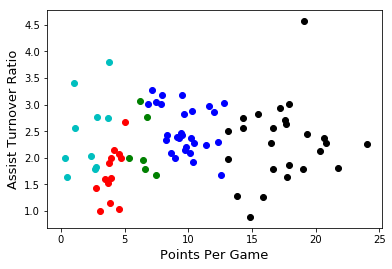

In [55]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

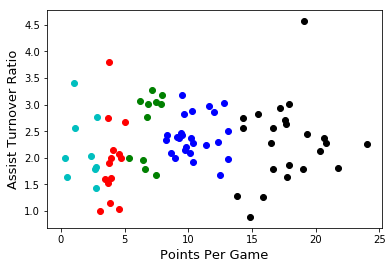

In [57]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['ppg']), np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

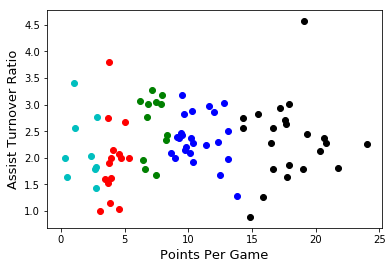

In [58]:
# recalculating centroids again
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

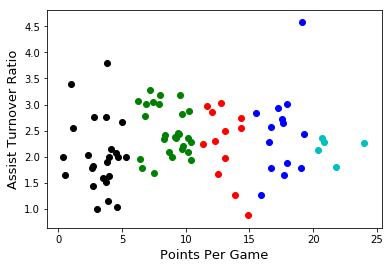

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_
visualize_clusters(point_guards, num_clusters)